<a href="https://colab.research.google.com/github/Emanoeljunior/Control-System/blob/master/Sistemas_de_1a_Ordem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importando bibliotecas

In [ ]:
# Bibliotecas para uso de imagens
from IPython.display import Image
# Outras bibliotecas 
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import sympy as sym
from sympy.abc import s,t,x,y,z
from sympy.integrals import inverse_laplace_transform
from scipy.integrate import odeint
from sympy import *


##Exercício 1

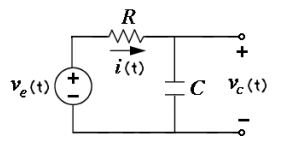

In [ ]:
Image("/content/drive/My Drive/Udesc/2020 1/ISC/LAB/imagens/circuito1.png",width=300)

${R= 560 k \Omega}$

${C=10\mu F}$  

${ t_{s(2\%) }= 4 \tau}$  

 ${ t_{s(5\%)} = 3 \tau}$



###Fazendo a transformada de Laplace e tirando a função de transferência do circuito:





${V_c(s)= V_e(s)\dfrac{1/sC}{R+1/sC}}$

${\dfrac{V_c(s)}{V_e(s)} = \dfrac{1}{sRC+1} = \dfrac{1/RC}{s+1/RC} = \dfrac{178.57 \times 10^{-3}}{s+178.57 \times 10^{-3}} }$


###Calculando a constante de tempo


Comparando as fórmulas temos

${  \dfrac{1}{s \tau+1} =  \dfrac{1}{sRC+1}}$

portanto:

${\tau = RC = 5.6}$

${t_{(5\%)} = 3 \tau = 16.8 s}$

${t_{(2\%)} = 5 \tau = 28 s}$

###Resposta ao degrau de 5V e análise gráfica

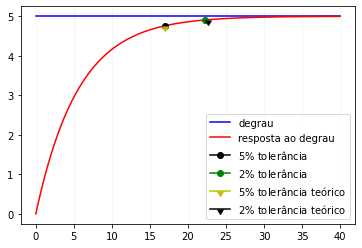

In [ ]:
R = 560*10**(3)
C = 10*10**(-6)
num = [1/(R*C)]
den = [1,1/(R*C)]

num_step = [5]
den_step = [1,0]
step = signal.TransferFunction(num_step,den_step)

sys_num = np.convolve(num, num_step)
sys_den = np.convolve(den,den_step)

sys = signal.TransferFunction(sys_num,sys_den)
t = np.linspace(0,40,100)
t,y1 = signal.impulse(sys,0,t)
t,y_stp = signal.impulse(step,0,t) 


    

plt.plot(t,y_stp, "-b", label='degrau')
plt.plot(t, y1,  "-r", label='resposta ao degrau')
plt.plot([t.take(y1.searchsorted(4.75))],[y1.take(y1.searchsorted(4.75))], "-k", marker="o",label='${5\%}$ tolerância')
plt.plot([t.take(y1.searchsorted(4.9))],[y1.take(y1.searchsorted(4.9))], "-g", marker="o",label='${2\%}$ tolerância')

plt.plot([t.take(t.searchsorted(16.8))],[y1.take(t.searchsorted(16.8))], "-y", marker=11,label='${5\%}$ tolerância teórico')
plt.plot([t.take(t.searchsorted(22.4))],[y1.take(t.searchsorted(22.4))], "-k", marker=11,label='${2\%}$ tolerância teórico')
plt. legend(loc = 'best')
plt.grid(axis='x', color='0.95')

plt.show()


###Resposta a rampa de inclinação 3

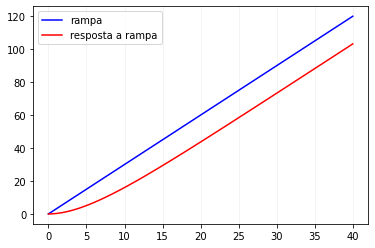

In [ ]:
R = 560*10**(3)
C = 10*10**(-6)
num = [1/(R*C)]
den = [1,1/(R*C)]

num_ramp = [3]
den_ramp = [1,0,0]
ramp = signal.TransferFunction(num_ramp,den_ramp)

sys_num = np.convolve(num, num_ramp)
sys_den = np.convolve(den,den_ramp)

sys = signal.TransferFunction(sys_num,sys_den)
t = np.linspace(0,40,100)
t,y = signal.impulse(sys,0,t)
t,y_ramp = signal.impulse(ramp,0,t) 

plt.plot(t,y_ramp, "-b", label='rampa')
plt.plot(t, y,  "-r", label='resposta a rampa')
plt. legend(loc = 'best')
plt.grid(axis='x', color='0.95')
plt.show()

##Exercício 2

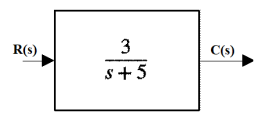

In [ ]:
Image("/content/drive/My Drive/Udesc/2020 1/ISC/LAB/imagens/bloco2.png",width=300)

### Resposta analítica

${G(s) = \dfrac {3}{s+5} = \dfrac{C(s)}{R(s)}}$

${C(s) = R(s) \dfrac {3}{s+5}}$

${R(s) = \dfrac{2}{s}}$

${C(s) = \dfrac{2}{s} \dfrac {3}{s+5} = \dfrac{6/5}{s} - \dfrac{6/5}{s+5}}$

${c(t) =  \dfrac{6}{5} - \dfrac{6}{5} e^{-5t}}$

O valor final será:

${c(\infty) = \dfrac{6}{5}}$


### Resposta analítica pelo sympy
Degrau em 1s

In [ ]:
import sympy as sym
from sympy.abc import s,t,x,y,z
import numpy as np
from sympy.integrals import inverse_laplace_transform
import matplotlib.pyplot as plt

# Define inputs
# First step (up) starts at 1 sec
U1 = 2/s*sym.exp(-s)

# Transfer function
G = 3/(s+5)

# Calculate responses
Y1 = G * U1

# Inverse Laplace Transform
u1 = inverse_laplace_transform(U1,s,t)
y1 = inverse_laplace_transform(Y1,s,t)

print('c(t) =')
print(y1)


c(t) =
6*(-exp(-5*t + 5) + 1)*Heaviside(t - 1)/5


###Resposta do Sistema

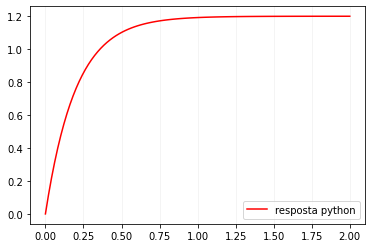

In [ ]:
num = [3]
den = [1,5]

num_step = [2]
den_step = [1,0]
step = signal.TransferFunction(num_step,den_step)

sys_num = np.convolve(num, num_step)
sys_den = np.convolve(den,den_step)

sys = signal.TransferFunction(sys_num,sys_den)
t = np.linspace(0,2,100)
t,y1 = signal.impulse(sys,0,t)
t,y_stp = signal.impulse(step,0,t) 

#plt.plot(t,y_stp, "-b", label='degrau')
plt.plot(t, y1,  "-r", label='resposta python')

plt. legend(loc = 'best')
plt.grid(axis='x', color='0.95')

plt.show()

###Resposta analítica

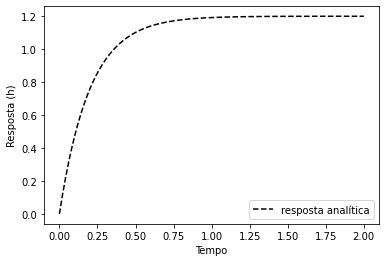

In [ ]:

t1 = np.linspace(0,2,100)
y1_1 = ((6/5)*(-np.exp(-5*t1) +1)) 

# Plotando gráfico
plt.figure(1)
plt.plot(t1,y1_1,"k--", label='resposta analítica')

plt. legend(loc = 'best')
plt.xlabel('Tempo')
plt.ylabel('Resposta (h)')
plt.show()

## Exercício 3 - Termômetro

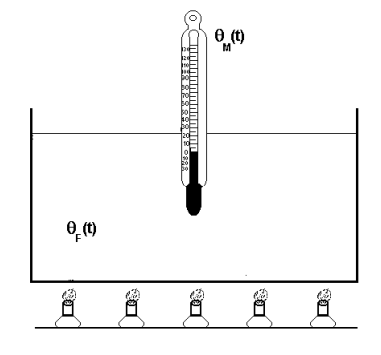

In [ ]:
Image("/content/drive/My Drive/Udesc/2020 1/ISC/LAB/imagens/termometro.png",width=300)

### Dedução fórmula de 1° Ordem para o termômetro



${\theta_f(t) = \theta_ 0 + k(1- e^{-\frac{t}{RC}})}$

${\dfrac{d\theta}{dt} = \dfrac{1}{\tau}(u - \theta)}$

Aplicando a transformada de laplace:

${G(s) =  \dfrac{1/RC}{s+1/RC} }$

Descobrindo a constante de tempo:

Temperatura inicial: ${ \theta_f(t) =25°C}$

Degrau: ${55 \mu(t) °C}$
${}$

${\theta_f(t) = 25 + 30(1-e^{-t/\tau})}$

${\theta_f(t =3)=50 = 25 + 30(1-e^{-t/\tau})}$

${\tau = \dfrac{3}{ln(6)}=1.6743}$

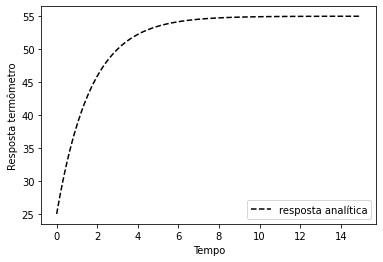

In [ ]:
t1 = np.linspace(0,15,100)
y1_1 = (25 + (30)*(-np.exp(-t1/1.6743) +1)) 

# Plotando gráfico
plt.figure(1)
plt.plot(t1,y1_1,"k--", label='resposta analítica')

plt. legend(loc = 'best')
plt.xlabel('Tempo')
plt.ylabel('Resposta termômetro')
plt.show()

###Resposta do termômetro a uma rampa

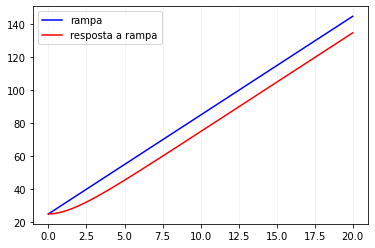

In [ ]:
tau = 1.6743
num = [1/(tau)]
den = [1,1/(tau)]
y0 = 25

num_ramp = [6]
den_ramp = [1,0,0]
ramp = signal.TransferFunction(num_ramp,den_ramp)

sys_num = np.convolve(num, num_ramp)
sys_den = np.convolve(den,den_ramp)

sys = signal.TransferFunction(sys_num,sys_den)
t = np.linspace(0,20,100)
t,y = signal.impulse(sys,0,t)
t,y_ramp = signal.impulse(ramp,0,t) 


plt.plot(t,y_ramp +y0, "-b", label='rampa')
plt.plot(t, y+y0,  "-r", label='resposta a rampa')
plt. legend(loc = 'best')
plt.grid(axis='x', color='0.95')
plt.show()



### Cálculo do erro

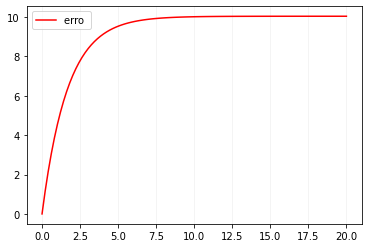

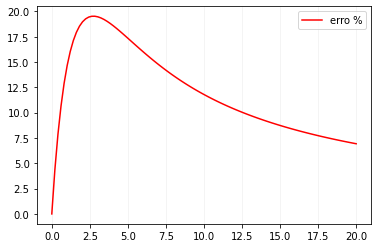

In [ ]:

erro = (y_ramp - y)
plt.plot(t,erro,  "-r", label='erro ')
plt. legend(loc = 'best')
plt.grid(axis='x', color='0.95')
plt.show()

erro_p = 100*(erro)/(y_ramp+y0)
plt.plot(t,erro_p,  "-r", label='erro %')
plt. legend(loc = 'best')
plt.grid(axis='x', color='0.95')
plt.show()